## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_csv("housing.csv")

In [3]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
house_data_stage1= house_data.dropna()

In [7]:
house_data_stage1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Split Data 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X= house_data_stage1.drop(['median_house_value'],axis=1)
y= house_data_stage1['median_house_value']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Data Exploration

In [11]:
train_data= X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9020,-118.80,34.15,9.0,1143.0,179.0,647.0,180.0,6.8474,NEAR OCEAN,356700.0
5321,-118.43,34.05,52.0,1693.0,290.0,727.0,305.0,6.7115,<1H OCEAN,500001.0
7938,-118.11,33.86,33.0,2389.0,410.0,1229.0,393.0,5.3889,<1H OCEAN,234900.0
12405,-116.24,33.76,9.0,1961.0,595.0,966.0,275.0,3.8125,INLAND,96700.0
12437,-116.17,33.66,22.0,639.0,203.0,664.0,153.0,1.9306,INLAND,47500.0
...,...,...,...,...,...,...,...,...,...,...
3829,-118.46,34.19,20.0,5992.0,1820.0,4826.0,1632.0,2.7237,<1H OCEAN,233500.0
8929,-118.48,34.01,31.0,1829.0,458.0,719.0,392.0,4.4000,<1H OCEAN,353800.0
2203,-119.85,36.82,9.0,3995.0,778.0,1691.0,712.0,3.3239,INLAND,91300.0
14323,-117.15,32.71,52.0,217.0,82.0,531.0,93.0,1.6607,NEAR OCEAN,137500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

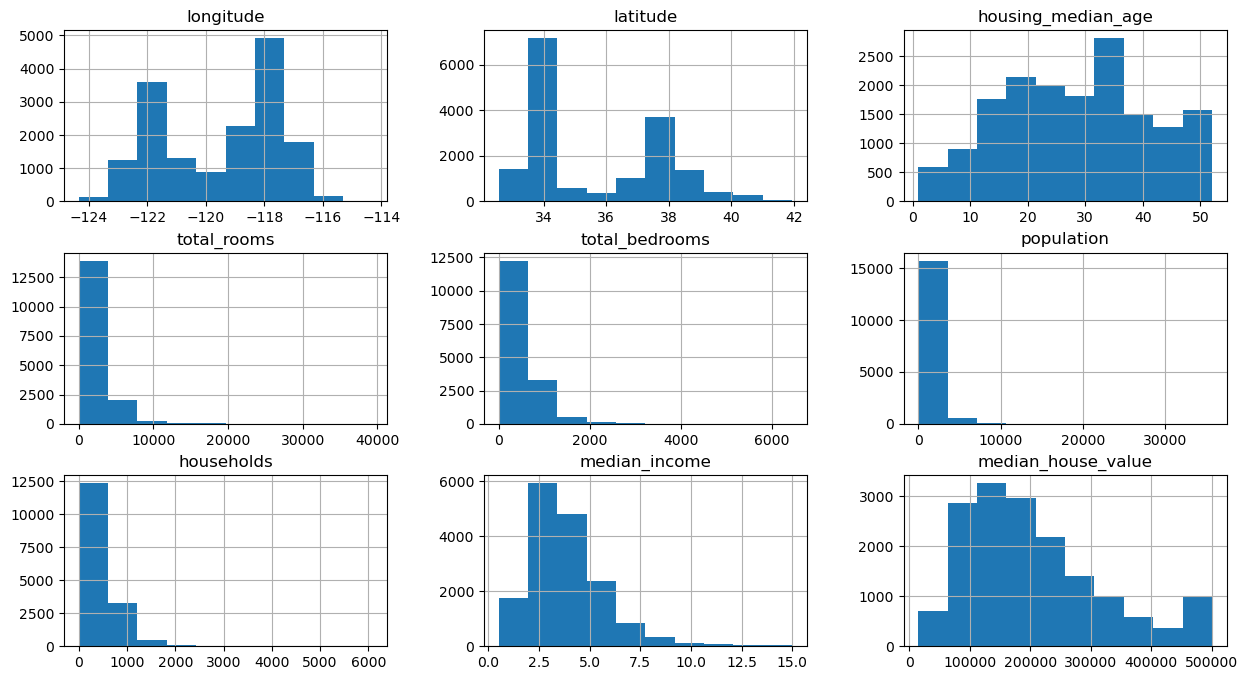

In [12]:
train_data.hist(figsize=(15,8))

In [13]:
train_data_without_ocean_proximity= train_data.drop(['ocean_proximity'],axis=1)
train_data_without_ocean_proximity.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924282,-0.113292,0.039252,0.063434,0.095138,0.049963,-0.017871,-0.051083
latitude,-0.924282,1.000000,0.013651,-0.031356,-0.061669,-0.104672,-0.066712,-0.077929,-0.140478
housing_median_age,-0.113292,0.013651,1.000000,-0.354932,-0.314725,-0.290125,-0.297138,-0.112296,0.116081
total_rooms,0.039252,-0.031356,-0.354932,1.000000,0.929487,0.856085,0.917682,0.195202,0.132367
total_bedrooms,0.063434,-0.061669,-0.314725,0.929487,1.000000,0.876613,0.978953,-0.008483,0.050247
population,0.095138,-0.104672,-0.290125,0.856085,0.876613,1.000000,0.906513,0.002143,-0.025672
households,0.049963,-0.066712,-0.297138,0.917682,0.978953,0.906513,1.000000,0.013209,0.065926
median_income,-0.017871,-0.077929,-0.112296,0.195202,-0.008483,0.002143,0.013209,1.000000,0.685433
median_house_value,-0.051083,-0.140478,0.116081,0.132367,0.050247,-0.025672,0.065926,0.685433,1.000000


<Axes: >

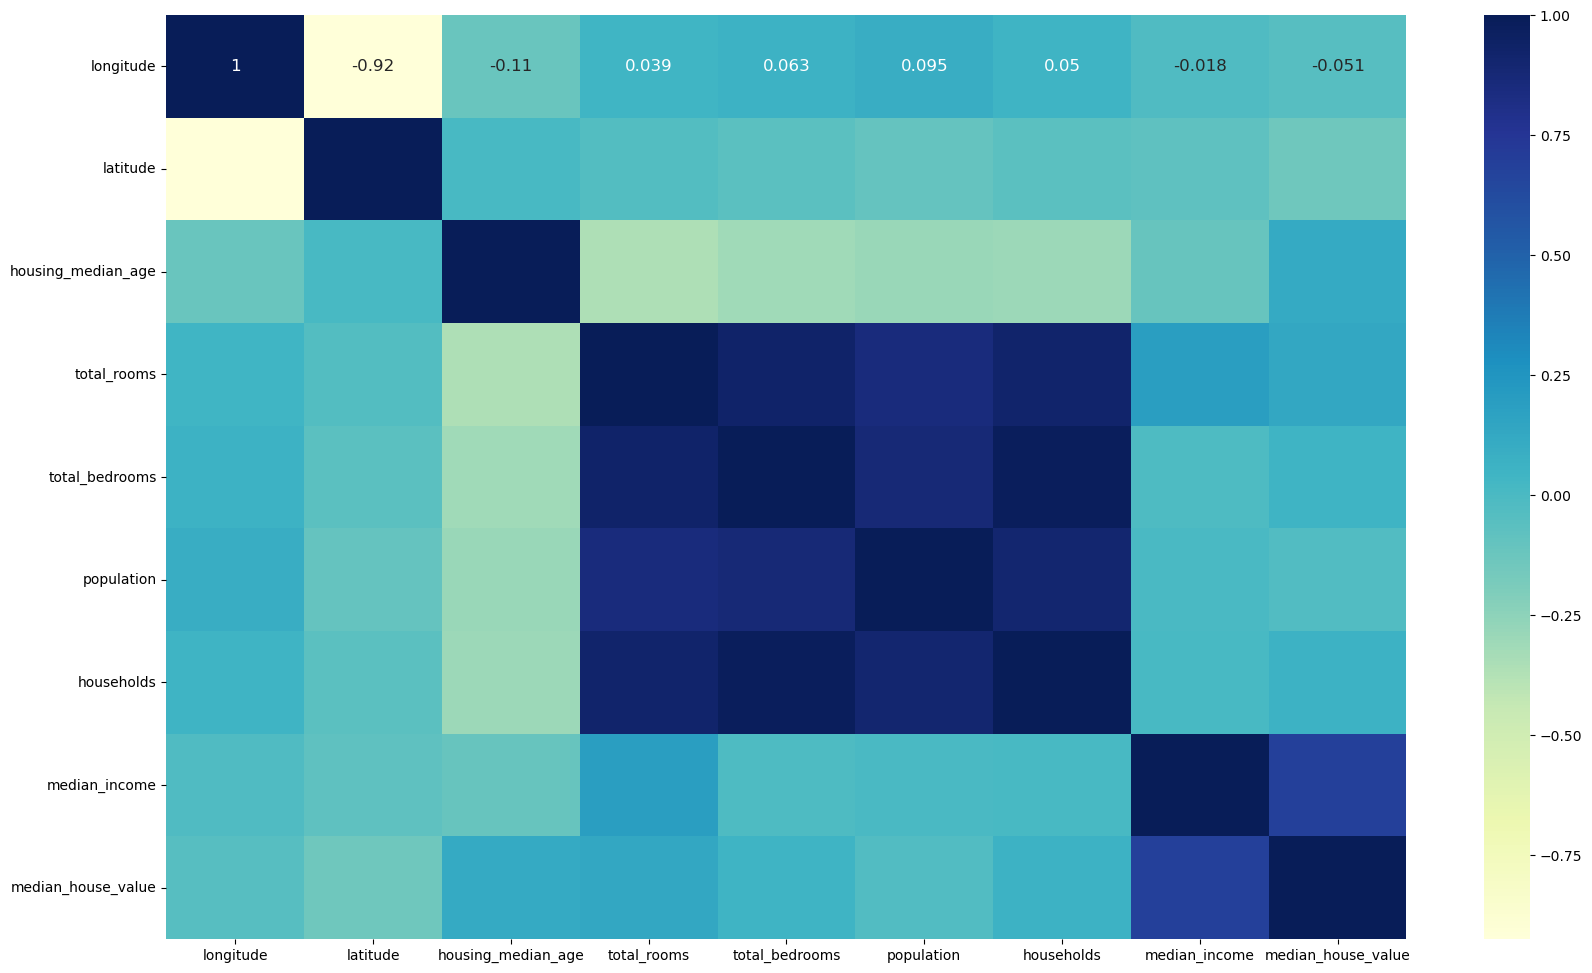

In [14]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data_without_ocean_proximity.corr(),annot=True, cmap="YlGnBu",annot_kws={"size": 12})

## Data Preprocessing

In [15]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

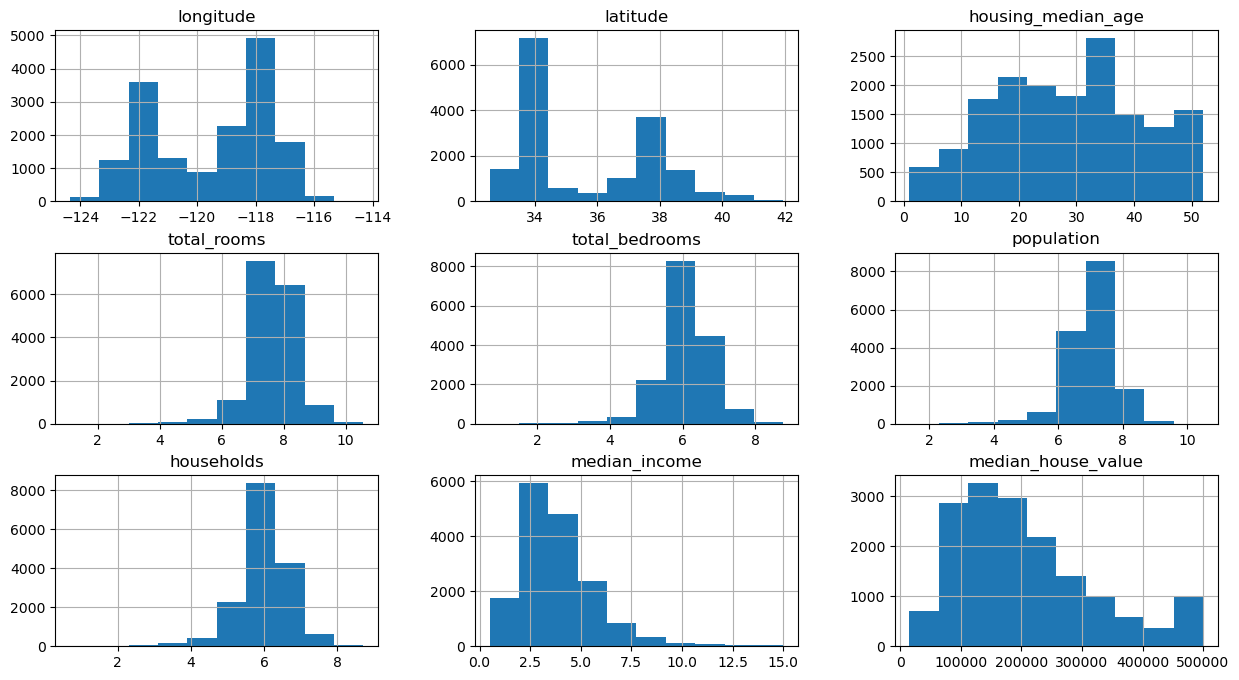

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7247
INLAND        5201
NEAR OCEAN    2096
NEAR BAY      1798
ISLAND           4
Name: count, dtype: int64

In [18]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

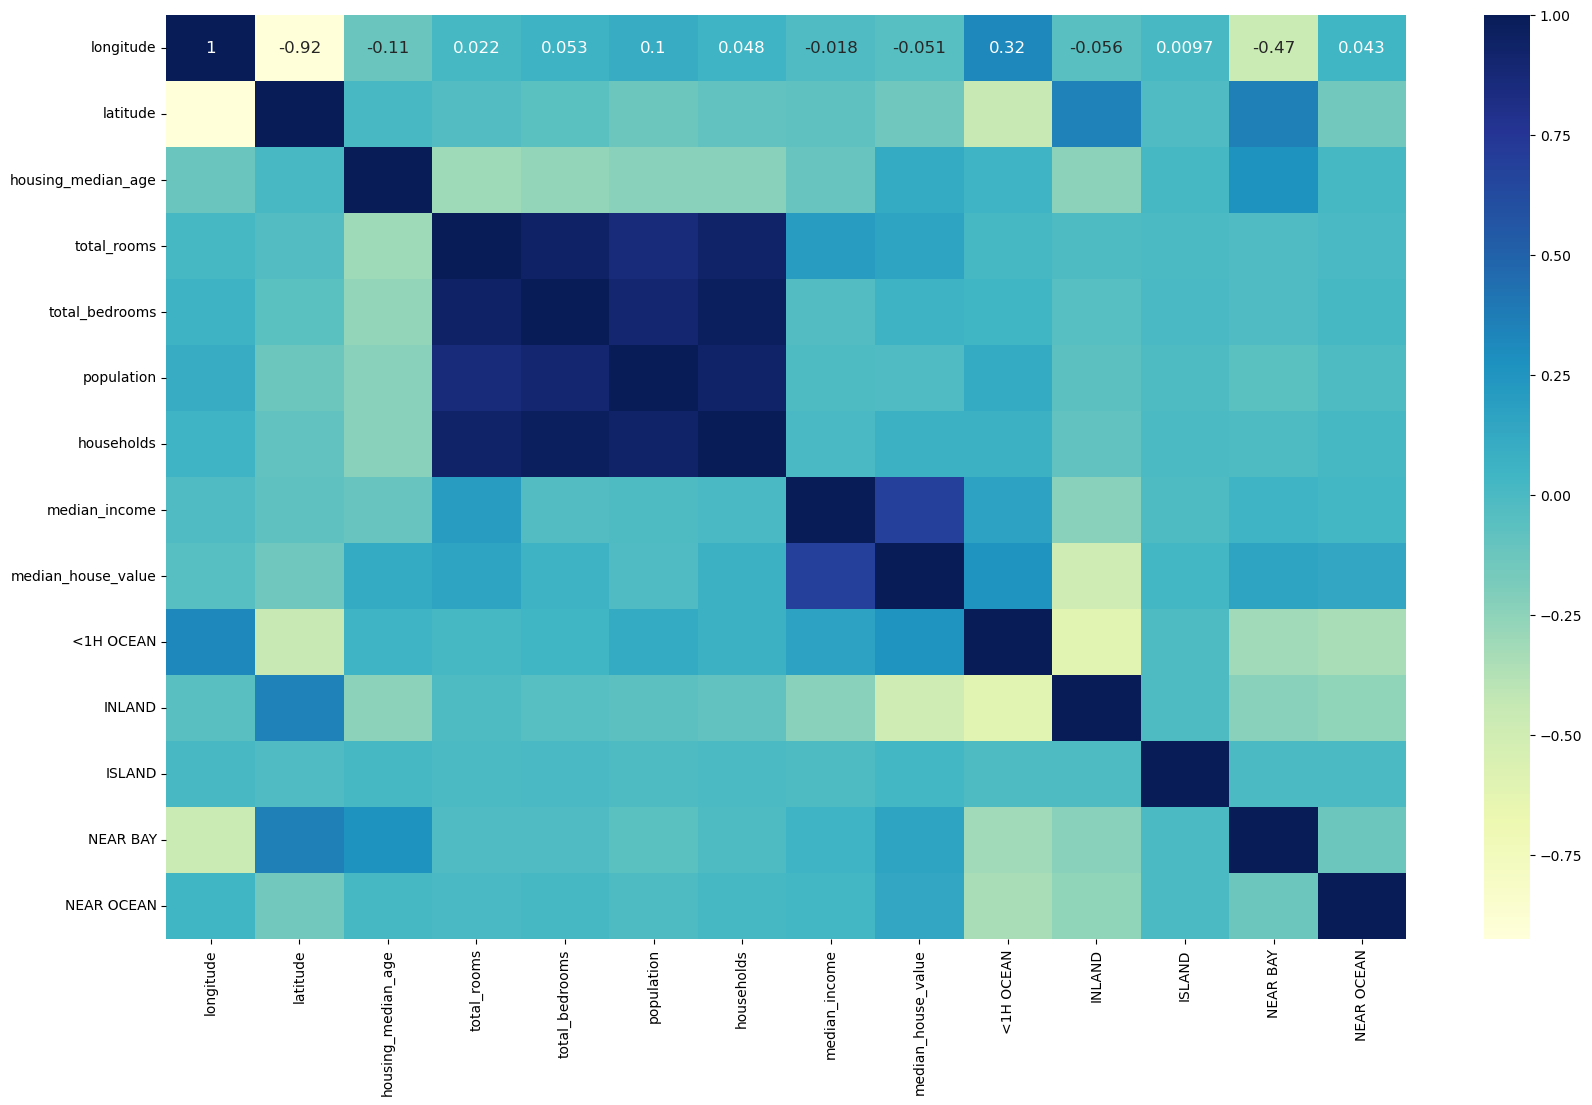

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu",annot_kws={"size": 12})

<Axes: xlabel='latitude', ylabel='longitude'>

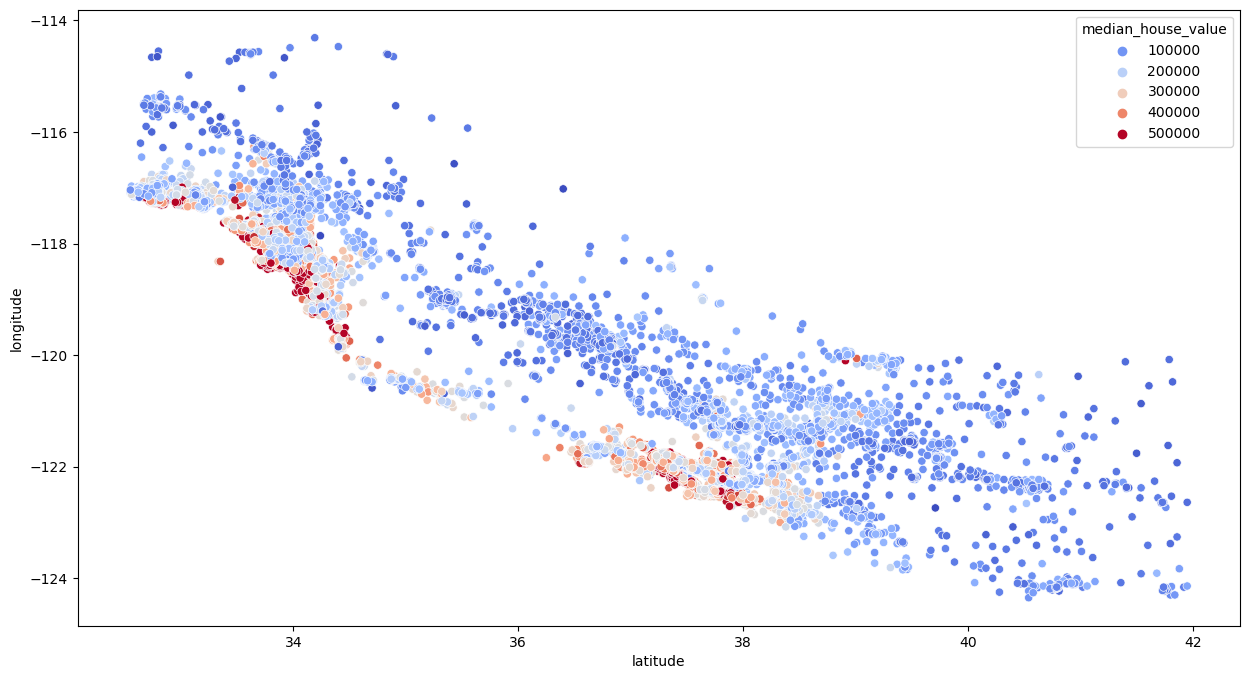

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude', data=train_data, hue='median_house_value'
                ,palette='coolwarm')

## Features Engineering

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']

In [22]:
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']

<Axes: >

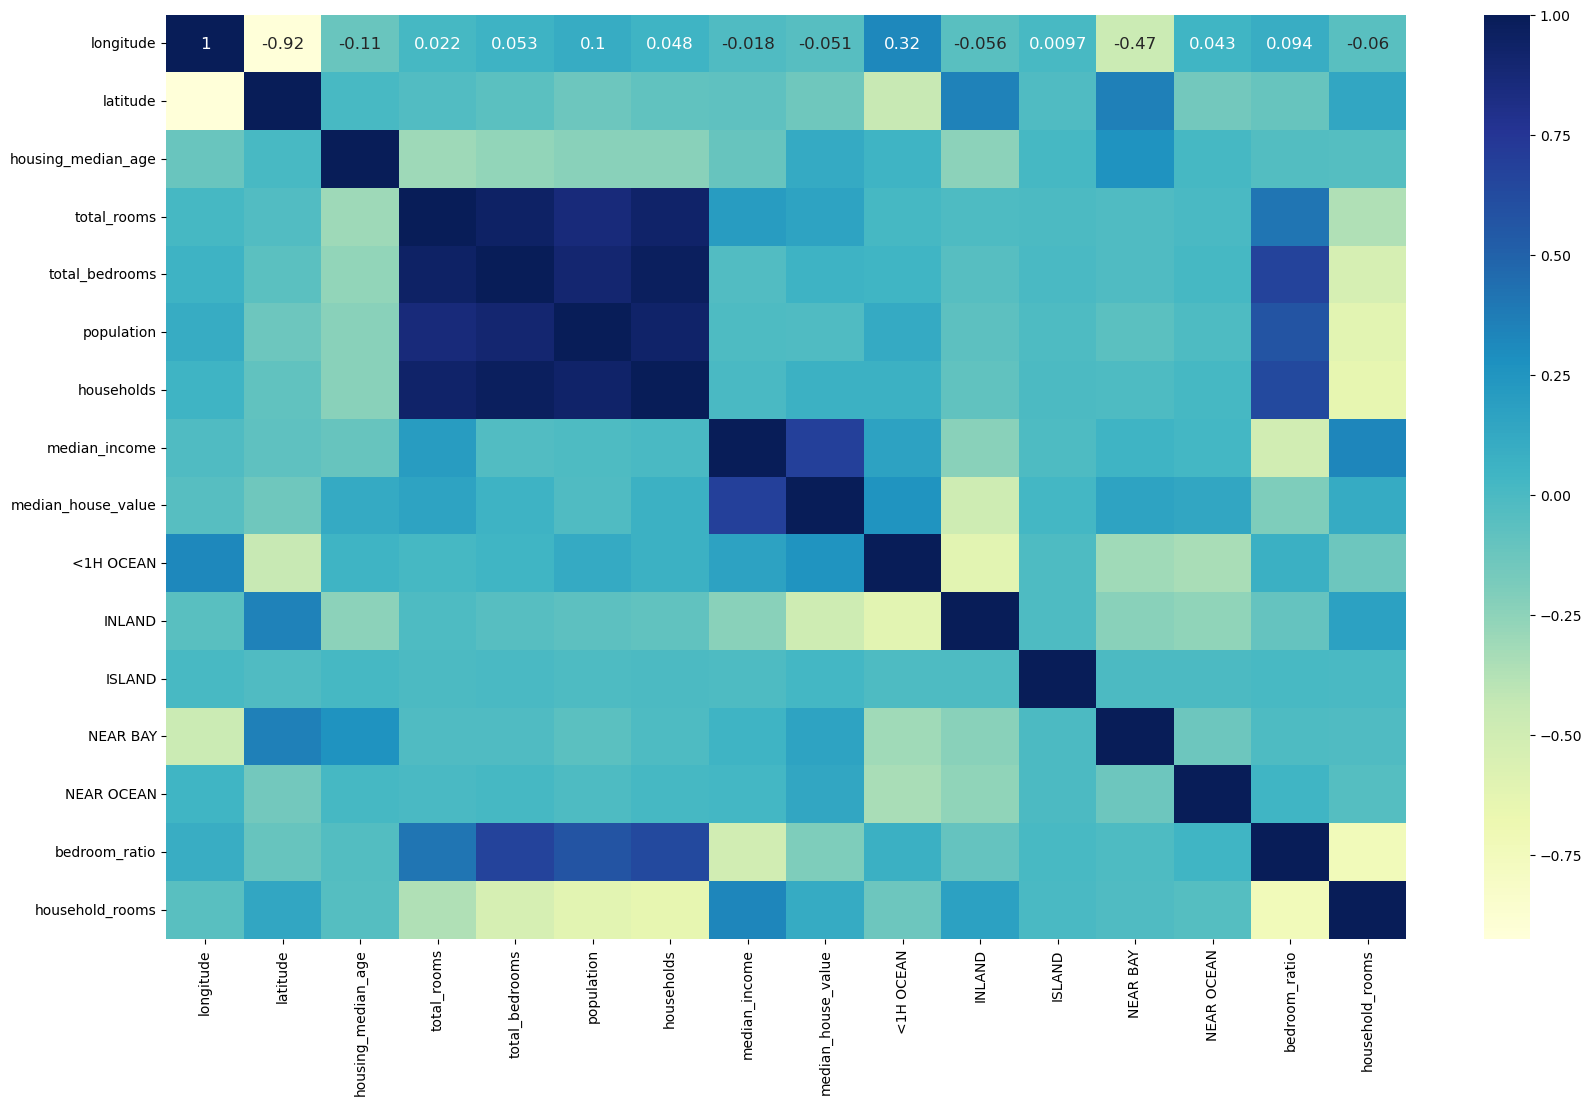

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu",annot_kws={"size": 12})

## Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X_train=train_data.drop(['median_house_value'],axis=1)
y_train=train_data['median_house_value']

In [26]:
model = LinearRegression().fit(X_train,y_train)

In [27]:
test_data= X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/ test_data['households']

In [28]:
X_test=test_data.drop(['median_house_value'],axis=1)
y_test=test_data['median_house_value']

In [29]:
model.score(X_test,y_test)

0.6797572194173959

## Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [32]:
forest.score(X_test,y_test)

0.8152173574615166

In [33]:
from sklearn.model_selection import GridSearchCV

forest =RandomForestRegressor()
param_grid = {"n_estimators":[100,200,300],
             "min_samples_split":[2,4],
              "max_depth":[None,4,8]
             }

grid_search = GridSearchCV(forest, param_grid,cv=5, 
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train,y_train)

KeyboardInterrupt: 

In [34]:
grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [35]:
grid_search.best_estimator_.score(X_test,y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## XGBOOST Model

In [37]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
import xgboost as xgb

In [46]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9020,-118.80,34.15,9.0,7.042286,5.192957,6.473891,5.198497,6.8474,356700.0,False,False,False,False,True,0.737396,1.354677
5321,-118.43,34.05,52.0,7.434848,5.673323,6.590301,5.723585,6.7115,500001.0,True,False,False,False,False,0.763072,1.298984
7938,-118.11,33.86,33.0,7.779049,6.018593,7.114769,5.976351,5.3889,234900.0,True,False,False,False,False,0.773693,1.301639
12405,-116.24,33.76,9.0,7.581720,6.390241,6.874198,5.620401,3.8125,96700.0,False,True,False,False,False,0.842848,1.348964
12437,-116.17,33.66,22.0,6.461468,5.318120,6.499787,5.036953,1.9306,47500.0,False,True,False,False,False,0.823051,1.282813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,-118.46,34.19,20.0,8.698347,7.507141,8.481980,7.398174,2.7237,233500.0,True,False,False,False,False,0.863054,1.175742
8929,-118.48,34.01,31.0,7.512071,6.129050,6.579251,5.973810,4.4000,353800.0,True,False,False,False,False,0.815894,1.257501
2203,-119.85,36.82,9.0,8.293049,6.658011,7.433667,6.569481,3.3239,91300.0,False,True,False,False,False,0.802842,1.262360
14323,-117.15,32.71,52.0,5.384495,4.418841,6.276643,4.543295,1.6607,137500.0,False,False,False,False,True,0.820660,1.185152


In [85]:
new_column_name = '<1H OCEAN'.replace("<", "")

# Renaming the column
train_data.rename(columns={'<1H OCEAN': new_column_name}, inplace=True)

In [86]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9020,-118.80,34.15,9.0,7.042286,5.192957,6.473891,5.198497,6.8474,356700.0,False,False,False,False,True,0.737396,1.354677
5321,-118.43,34.05,52.0,7.434848,5.673323,6.590301,5.723585,6.7115,500001.0,True,False,False,False,False,0.763072,1.298984
7938,-118.11,33.86,33.0,7.779049,6.018593,7.114769,5.976351,5.3889,234900.0,True,False,False,False,False,0.773693,1.301639
12405,-116.24,33.76,9.0,7.581720,6.390241,6.874198,5.620401,3.8125,96700.0,False,True,False,False,False,0.842848,1.348964
12437,-116.17,33.66,22.0,6.461468,5.318120,6.499787,5.036953,1.9306,47500.0,False,True,False,False,False,0.823051,1.282813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,-118.46,34.19,20.0,8.698347,7.507141,8.481980,7.398174,2.7237,233500.0,True,False,False,False,False,0.863054,1.175742
8929,-118.48,34.01,31.0,7.512071,6.129050,6.579251,5.973810,4.4000,353800.0,True,False,False,False,False,0.815894,1.257501
2203,-119.85,36.82,9.0,8.293049,6.658011,7.433667,6.569481,3.3239,91300.0,False,True,False,False,False,0.802842,1.262360
14323,-117.15,32.71,52.0,5.384495,4.418841,6.276643,4.543295,1.6607,137500.0,False,False,False,False,True,0.820660,1.185152


In [87]:
X=train_data.drop(['median_house_value'],axis=1)
y=train_data['median_house_value']

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [89]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
11340,-117.93,33.75,24.0,7.230563,5.828946,7.295056,5.720312,4.2219,True,False,False,False,False,0.806154,1.264016
17803,-121.87,37.39,9.0,7.833204,6.306275,7.372746,6.177944,4.9091,True,False,False,False,False,0.805070,1.267931
15540,-117.14,33.07,12.0,9.138092,7.380256,8.312626,7.316548,4.3513,True,False,False,False,False,0.807636,1.248962
7888,-118.06,33.88,17.0,8.880168,6.979145,8.254529,6.974479,6.5901,True,False,False,False,False,0.785925,1.273238
20495,-118.71,34.29,21.0,7.920083,6.202536,7.267525,6.182085,5.2067,True,False,False,False,False,0.783140,1.281135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,-119.78,36.31,14.0,7.160846,5.676754,6.603944,5.598422,3.1667,False,True,False,False,False,0.792749,1.279083
17323,-120.14,34.59,24.0,7.379008,5.645447,6.595781,5.655992,4.2026,False,False,False,False,True,0.765069,1.304636
14879,-117.07,32.63,37.0,7.742402,5.940171,6.934397,5.880533,3.4550,False,False,False,False,True,0.767226,1.316616
1671,-122.21,38.06,52.0,7.914252,6.327937,6.981935,6.190315,3.6154,False,False,False,True,False,0.799562,1.278489


In [90]:
model = xgb.XGBRegressor(enable_categorical=True,random_state=42)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [91]:
model.score(X_test,y_test)

0.8221302375824254